<a href="https://colab.research.google.com/github/biffsocko/SUNY_Poly_NCS590/blob/main/TomMurphy_assingment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tom Murphy<br>
NCS590 <br>
Lab4 / Task3

Added "rooms_per_person in this section.  Also added DEBUG variable for troubleshooting sometimes.

In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


DEBUG=0

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=',')
training_df["rooms_per_person"] = (training_df["total_rooms"] / training_df["population"])

if(DEBUG > 0 ):
    print(training_df)


In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  #plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [ ]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Epoch 1/100
1700/1700 [==============================] - 3s 2ms/step - loss: 56422727680.0000 - root_mean_squared_error: 237534.6719
Epoch 2/100
1700/1700 [==============================] - 2s 1ms/step - loss: 56420589568.0000 - root_mean_squared_error: 237530.1875
Epoch 3/100
1700/1700 [==============================] - 2s 1ms/step - loss: 56418443264.0000 - root_mean_squared_error: 237525.6719
Epoch 4/100
1700/1700 [==============================] - 2s 1ms/step - loss: 56416264192.0000 - root_mean_squared_error: 237521.0781
Epoch 5/100
1700/1700 [==============================] - 3s 2ms/step - loss: 56414216192.0000 - root_mean_squared_error: 237516.7656
Epoch 6/100
1700/1700 [==============================] - 3s 2ms/step - loss: 56412028928.0000 - root_mean_squared_error: 237512.1719
Epoch 7/100
1700/1700 [==============================] - 2s 1ms/step - loss: 56409899008.0000 - root_mean_squared_error: 237507.6875
Epoch 8/100
1700/1700 [==============================] - 3s 2ms/step 

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


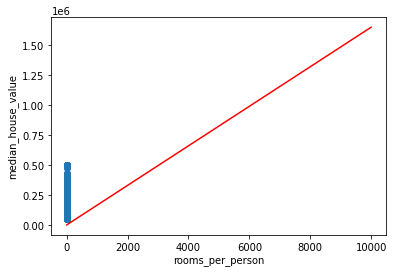

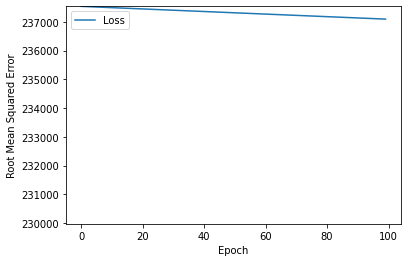

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2  53000             419
    2  92500             467
    2  69100             444
    2  62000             512
    1  80000             408
    2 295300             570
    2 500001             508
    2 342500             562
    4 117600             833
    2 128300             524
    2 187300             566
    3  79500             609
    2 111900             569
    2  95200             545
    2  69300             509


In [ ]:
# Define a synthetic feature named rooms_per_person
#training_df["rooms_per_person"] = (training_df["total_rooms"] / training_df["population"])
#3 # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"
my_label="median_house_value"

# Assign values to these three hyperparameters.
learning_rate = 0.01
epochs = 100
batch_size = 10


# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)